In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Braves players

braves_data = master_data.loc[master_data["Franchise"] == "Braves"]

#Only showing players that signed with the Braves

signed_braves_data = braves_data.loc[braves_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_braves_data.groupby("Year")

#Unsigned Braves draft picks

unsigned_braves_data = braves_data.loc[braves_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
2002    48.4
2007    48.0
2000    46.2
1993    38.8
1985    36.9
2005    34.8
1982    32.8
1990    32.8
2010    32.4
1988    30.2
1978    22.8
1996    22.8
1967    22.4
1984    22.0
1983    20.5
1974    18.7
2003    18.4
1979    16.7
2008    14.2
1966    13.7
2012    13.2
1965    12.9
1980    12.6
1991    12.2
1989    12.2
2006    10.4
1976     9.8
1987     9.3
2011     8.0
1975     7.7
2015     7.4
2009     7.3
1998     6.6
1999     4.3
2001     4.1
1986     3.2
1997     3.0
1972     2.0
1977     1.1
2013     0.8
1992     0.6
1995     0.6
1981     0.0
2018     0.0
2016     0.0
2019     0.0
2014    -0.1
2004    -0.2
1968    -0.4
1971    -0.4
2017    -0.5
1969    -0.6
1994    -2.0
1970    -2.6
1973    -3.5
Name: Total_WAR, dtype: float64

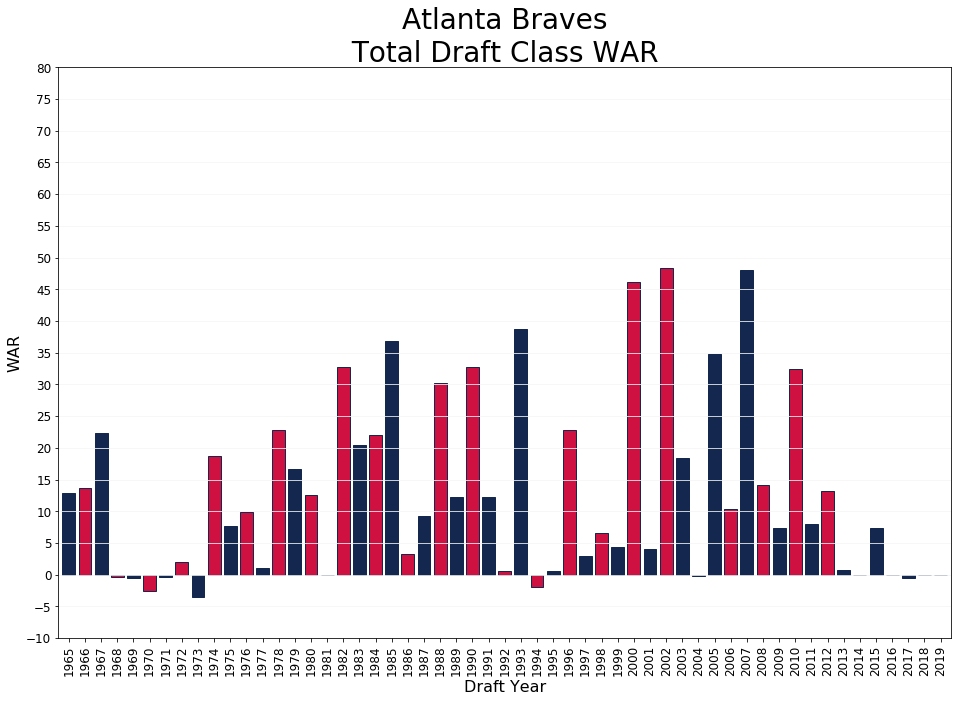

In [6]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#13274F", "#CE1141"], width = .8, fontsize = 12, edgecolor = "#13274F", figsize = (16, 10.5))
plt.title("Atlanta Braves\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Braves WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_braves_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
41297,2002,2,64,Braves,Braves,Y,Brian McCann,2005.0,mccanbr01,4810.0,34.7,0.0,34.7,C,HS,Duluth HS,Duluth,GA,More than 25 WAR
22444,1990,1,1,Braves,Braves,Y,Chipper Jones,1993.0,jonesch06,97.0,27.4,0.0,27.4,SS,HS,The Bolles School,Jacksonville,FL,More than 25 WAR
48710,2007,1,14,Braves,Braves,Y,Jason Heyward,2010.0,heywaja01,4940.0,26.0,0.0,26.0,OF,HS,Henry County HS,McDonough,GA,More than 25 WAR
27261,1993,11,320,Braves,Braves,Y,Kevin Millwood,1997.0,millwke01,106.0,-0.8,24.4,23.6,RHP,HS,Bessemer City HS,Bessemer City,NC,20-25 WAR
53244,2010,2,70,Braves,Braves,Y,Andrelton Simmons,2012.0,simmoan01,10847.0,23.2,0.0,23.2,SS,JC,Western Oklahoma State College,Altus,OK,20-25 WAR
16628,1985,4,94,Braves,Braves,Y,David Justice,1989.0,justida01,923.0,22.6,0.0,22.6,1B,4Yr,Thomas More College,Crestview Hills,KY,20-25 WAR
15742,1984,2,47,Braves,Braves,Y,Tom Glavine,1987.0,glavito02,90.0,1.9,20.3,22.2,LHP,HS,Billerica HS,Billerica,MA,20-25 WAR
19523,1988,1,3,Braves,Braves,Y,Steve Avery,1990.0,averyst01,1706.0,1.3,20.1,21.4,LHP,HS,John F. Kennedy HS,Taylor,MI,20-25 WAR
48774,2007,2,78,Braves,Braves,Y,Freddie Freeman,2010.0,freemfr01,5361.0,21.0,0.0,21.0,1B,HS,El Modena HS,Orange,CA,20-25 WAR
38325,2000,1,29,Braves,Braves,Y,Adam Wainwright,2005.0,wainwad01,2233.0,2.6,17.5,20.1,RHP,HS,Glynn Academy HS,Brunswick,GA,20-25 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_braves_data.loc[((signed_braves_data["WAR Group"] == "Less than 5 WAR") |
(signed_braves_data["WAR Group"] == "No Major League Experience")) & 
(signed_braves_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
11,1965,1,12,Braves,Braves,Y,Dick Grant,NaN,NaN,NaN,NaN,NaN,NaN,1B,HS,Watertown HS,Watertown,MA,No Major League Experience
834,1966,1,11,Braves,Braves,Y,Al Santorini,1968.0,santoal01,1011444.0,-0.5,3.9,3.4,RHP,HS,Union HS,Union,NJ,Less than 5 WAR
1666,1967,1,12,Braves,Braves,Y,Andy Finlay,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Luther Burbank HS,Sacramento,CA,No Major League Experience
2636,1968,1,7,Braves,Braves,Y,Curtis Moore,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Denison HS,Denison,TX,No Major League Experience
3553,1969,1,12,Braves,Braves,Y,Gene Holbert,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Palmyra HS,Palmyra,PA,No Major League Experience
4604,1970,1,21,Braves,Braves,Y,Ron Broaddus,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Brazosport HS,Freeport,TX,No Major League Experience
5520,1971,1,10,Braves,Braves,Y,Taylor Duncan,1977.0,duncata01,1003556.0,-0.1,0.0,-0.1,SS,HS,Grant Union HS,Sacramento,CA,Less than 5 WAR
6322,1972,1,11,Braves,Braves,Y,Preston Hanna,1975.0,hannapr01,1005318.0,0.1,1.9,2.0,RHP,HS,Escambia HS,Pensacola,FL,Less than 5 WAR
7112,1973,1,10,Braves,Braves,Y,Pat Rockett,1976.0,rockepa01,1011092.0,-5.0,0.0,-5.0,2B,HS,Robert E. Lee HS,San Antonio,TX,Less than 5 WAR
8554,1975,1,18,Braves,Braves,Y,Donald Young,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Dos Pueblos HS,Goleta,CA,No Major League Experience


In [9]:
#Best unsigned draft picks in franchise history

unsigned_braves_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
50970,2008,27,820,Braves,Braves,N,Anthony Rendon,2013.0,rendoan01,12861.0,32.7,0.0,32.7,SS,HS,Lamar HS,Houston,TX,More than 25 WAR
14126,1982,4,89,Braves,Braves,N,Randy Johnson,1988.0,johnsra05,60.0,-0.1,22.3,22.2,LHP,HS,Livermore HS,Livermore,CA,20-25 WAR
17816,1986,18,450,Braves,Braves,N,Tim Salmon,1992.0,salmoti01,32.0,22.0,0.0,22.0,OF,HS,Greenway HS,Phoenix,AZ,20-25 WAR
49044,2007,11,348,Braves,Braves,N,Brandon Belt,2011.0,beltbr01,10264.0,17.5,0.0,17.5,LHP,JC,San Jacinto College,Pasadena,TX,15-20 WAR
17634,1986,11,268,Braves,Braves,N,Steve Finley,1989.0,finlest01,54.0,16.4,0.0,16.4,OF,4Yr,Southern Illinois University Carbondale,Carbondale,IL,15-20 WAR
25954,1992,15,425,Braves,Braves,N,Jose Cruz,1997.0,cruzjo02,1296.0,15.6,0.0,15.6,OF,HS,Bellaire HS,Bellaire,TX,15-20 WAR
49702,2007,33,1006,Braves,Braves,N,Craig Kimbrel,2010.0,kimbrcr01,6655.0,0.0,13.5,13.5,RHP,JC,Wallace State Community College,Hanceville,AL,10-15 WAR
18036,1986,27,670,Braves,Braves,N,Ben McDonald,1989.0,mcdonbe01,1008454.0,0.0,13.3,13.3,RHP,HS,Denham Springs HS,Denham Springs,LA,10-15 WAR
25898,1992,13,369,Braves,Braves,N,Mark Hendrickson,2002.0,hendrma01,1574.0,0.1,11.0,11.1,LHP,HS,Mount Vernon HS,Mount Vernon,WA,10-15 WAR
29563,1994,32,902,Braves,Braves,N,Mark Hendrickson,2002.0,hendrma01,1574.0,0.1,11.0,11.1,LHP,4Yr,Washington State University,Pullman,WA,10-15 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_braves_data.loc[signed_braves_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
27261,1993,11,320,Braves,Braves,Y,Kevin Millwood,1997.0,millwke01,106.0,-0.8,24.4,23.6,RHP,HS,Bessemer City HS,Bessemer City,NC,20-25 WAR
33542,1996,53,1512,Braves,Braves,Y,Marcus Giles,2001.0,gilesma01,89.0,17.9,0.0,17.9,2B,JC,Grossmont College,El Cajon,CA,15-20 WAR
12055,1979,23,573,Braves,Braves,Y,Brett Butler,1981.0,butlebr01,1001772.0,15.1,0.0,15.1,OF,4Yr,Southeastern Oklahoma State University,Durant,OK,15-20 WAR
2158,1967,26,504,Braves,Braves,Y,Dusty Baker,1968.0,bakerdu01,1000450.0,11.8,0.0,11.8,OF,HS,El Campo HS,Citrus Heights,CA,10-15 WAR
27429,1993,17,488,Braves,Braves,Y,Jermaine Dye,1996.0,dyeje01,911.0,10.4,0.0,10.4,OF,JC,Cosumnes River College,Sacramento,CA,10-15 WAR
53879,2010,23,704,Braves,Braves,Y,Evan Gattis,2013.0,gattiev01,11003.0,8.9,0.0,8.9,C,4Yr,University of Texas of the Permian Basin,Odessa,TX,5-10 WAR
46700,2005,33,1007,Braves,Braves,Y,Tyler Flowers,2009.0,flowety01,9134.0,8.6,0.0,8.6,1B,JC,Chipola College,Marianna,FL,5-10 WAR
9009,1975,20,473,Braves,Braves,Y,Glenn Hubbard,1978.0,hubbagl01,1006120.0,7.6,0.0,7.6,2B,HS,Ben Lomond HS,Ogden,UT,5-10 WAR
39176,2000,29,880,Braves,Braves,Y,Adam LaRoche,2004.0,larocad01,1904.0,7.2,0.0,7.2,1B,JC,Seminole State College,Seminole,OK,5-10 WAR
46370,2005,22,677,Braves,Braves,Y,Tommy Hanson,2009.0,hansoto01,9129.0,-1.7,7.9,6.2,RHP,JC,Riverside Community College,Riverside,CA,5-10 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(braves_data["Year"], braves_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,51.4,45.9,2.7
1966,43.6,50.9,5.5
1967,11.4,86.4,2.3
1968,11.4,88.6,0.0
1969,30.3,66.7,3.0
1970,20.0,80.0,0.0
1971,12.0,80.0,8.0
1972,32.0,64.0,4.0
1973,33.3,66.7,0.0


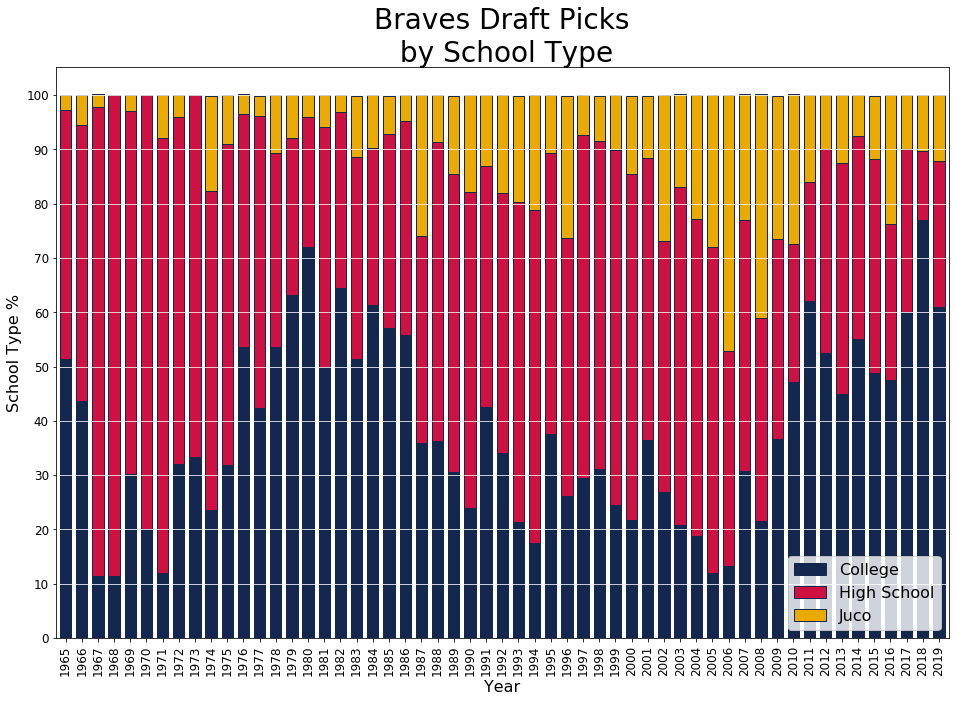

In [12]:
#Bar chart of table above

colors = ["#13274F", "#CE1141", "#EAAA00"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#13274F", stacked = True, figsize = (16, 10.5))
plt.title("Braves Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "whitesmoke", linestyle = "-", axis = "y")
plt.savefig("Braves Draft Picks by School Type.png")
plt.show()